## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from jupyterthemes import jtplot
jtplot.style()

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_mouse_merge = mouse_metadata.merge(study_results, left_on = 'Mouse ID', right_on = 'Mouse ID')

# Display the data table for preview
df_mouse_merge.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_qty = len(pd.unique(df_mouse_merge['Mouse ID']))
mouse_qty

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = df_mouse_merge.loc[df_mouse_merge.duplicated(subset=[
    'Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
show_duplicates = df_mouse_merge.loc[df_mouse_merge['Mouse ID'] == 'g989']
show_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = df_mouse_merge.drop_duplicates().reset_index(drop=True)
clean_df = clean_mouse[clean_mouse['Mouse ID'].isin(duplicate_mouse)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_qty = clean_df['Mouse ID'].nunique()
mouse_qty

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties 
# of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_stat= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_stat = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean': mean_stat, 'Median': median_stat, 'Variance': 
                           var_stat, 'Std. Dev.': stdv_stat, 'SEM': sem_stat})
summary_df

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen using the aggregation method, 
# produce the same summary statistics in a single line
agg_group = clean_df.groupby('Drug Regimen')
agg_summary = agg_group.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_summary.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

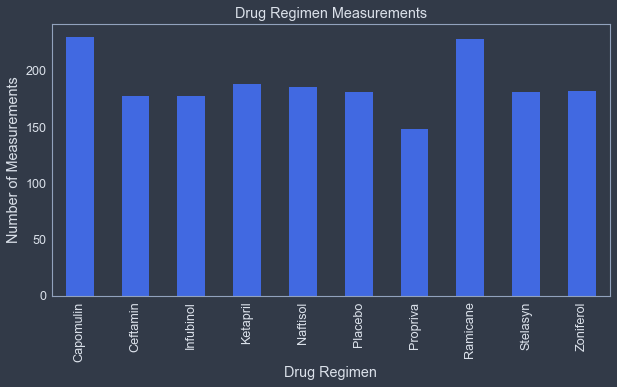

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_df = clean_df.groupby(['Drug Regimen']).count().reset_index()
regimen_data = regimen_df[['Drug Regimen', 'Mouse ID']].rename(columns={"Mouse ID": "Count"})
regimen_data = regimen_data.set_index('Drug Regimen')
regimen_data.plot(kind='bar', color='royalblue', figsize=(10,5,))

plt.grid(b=None)  # hide grid lines
plt.ylabel('Number of Measurements')

plt.gca().get_legend().remove()  # turn legend off
#plt.gca().get_bar().set_color('royalblue')
plt.title('Drug Regimen Measurements')
plt.show()

<BarContainer object of 10 artists>

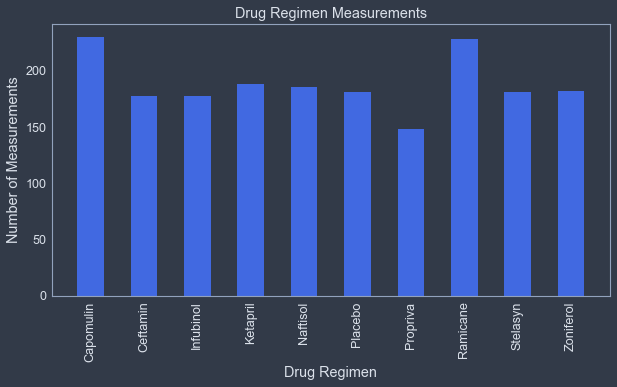

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# create drug regiment data set
regimen_list = summary_df.index.tolist()
x_axis = regimen_list

# Create regimen count
regimen_count = (clean_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
fig = plt.figure(figsize =(10, 5))  # format figure Size

# Format title
plt.title('Drug Regimen Measurements')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=90)
plt.grid(b=None)   # hide grid lines

# Plot bar chart
plt.bar(x_axis, regimen_count, color='royalblue', alpha=1, width=.5, align='center')
#plt.tight_layout()

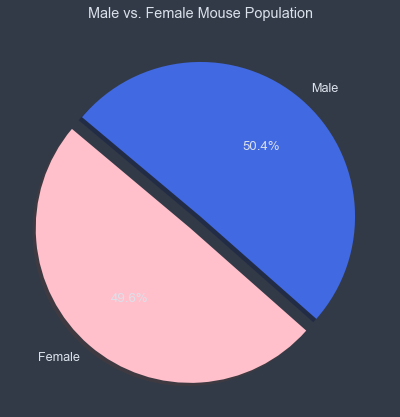

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create dataframe grouping unique players by Gender
gender_count = pd.DataFrame(clean_df.groupby('Sex')['Mouse ID'].nunique())

# Rename column
gender_count = gender_count.rename(columns={'Mouse ID':'Total Count'})

# Add column Percentage and calculate gender percentage
gender_count['Percentage Split'] = gender_count['Total Count'] / sum(gender_count['Total Count'])

# Plot
explode = (0.1, 0)
plot = gender_count.plot.pie(title='Male vs. Female Mouse Population', y='Total Count', figsize=(6, 6), colors = ['pink', 'royalblue'], startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plot.set_ylabel("")
plot.get_legend().remove()  # turn legend off
plt.tight_layout()

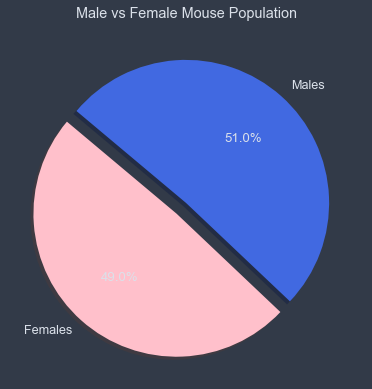

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# gender count female, male
gender_count = (clean_df.groupby(['Sex'])['Mouse ID'].count()).tolist()

# labels for the sections of the pie chart
labels = ['Females', 'Males']
plt.title('Male vs Female Mouse Population')

sizes = gender_count            # The values of each section of the pie chart
colors = ['#ff9999','#66b3ff']  # Colors each section of the pie chart
explode = (0.1, 0)              # Tells matplotlib not to seperate the sections

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=['pink', 'royalblue'],
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# capomulin, Ramicane, Infubinol, and Ceftamin

# Get max timepoint for each mouse
max_time = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())

# Merge max timepoint with the original dataframe to get the tumor volume at the last timepoint
merge_data = pd.merge(max_time, clean_df, on= ('Mouse ID', 'Timepoint'),how='left')

merge_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively 
# Determine if there are any potential outliers across all four treatment regimens.

list_key_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']  
filter_drug = merge_data[merge_data['Drug Regimen'].isin(list_key_drugs)]
tumor_vol = filter_drug.sort_values(['Drug Regimen']).groupby(['Drug Regimen'], sort=False)
####tumor_vol = filter_drug.groupby

drug_list = filter_drug['Drug Regimen'].tolist()
drug_list = list(set(drug_list))
print(drug_list)

# Create empty list to fill with tumor vol data (for plotting)
empty_tumor_list = []

# Filter_drug
tumor_vol.head()

['Infubinol', 'Ramicane', 'Ceftamin', 'Capomulin']


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
115,l897,45,Capomulin,Male,17,19,38.846876,1
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
192,u364,45,Capomulin,Male,18,17,31.023923,3
66,g316,45,Capomulin,Female,22,22,40.159220,2
154,q483,40,Ceftamin,Male,6,26,64.192341,1
88,j296,45,Ceftamin,Female,24,30,61.849023,3
109,l558,10,Ceftamin,Female,13,30,46.784535,0
94,k210,45,Ceftamin,Male,15,28,68.923185,3
113,l733,45,Ceftamin,Female,4,30,64.299830,1


In [15]:
# Capomulin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

# Capomulin IQR
capo_quar = capo_df['Tumor Volume (mm3)']
quartiles = capo_quar.quantile([.25,.5,.75])
lowerquart = quartiles[.25]
upperquart = quartiles[.75]
iqr = upperquart-lowerquart

print(f"The lower quartile of the tumor volume is: {lowerquart}")
print(f"The upper quartile of the tumor volume is: {upperquart}")
print(f"The interquartile range of the tumor volume is: {iqr}")
print(f"The the median of tumor the volume is: {quartiles[.5]} ")

# Determine outliers using upper and lower bounds
high = upperquart + (1.5*iqr)
low = lowerquart - (1.5*iqr)    

print(f"Values below {low} could be outliers.")
print(f"Values above {high} could be outliers.")

The lower quartile of the tumor volume is: 37.685932865
The upper quartile of the tumor volume is: 45.0
The interquartile range of the tumor volume is: 7.314067135000002
The the median of tumor the volume is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [16]:
# Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

# Capomulin IQR
ceft_quar = capo_df['Tumor Volume (mm3)']
quartiles = capo_quar.quantile([.25,.5,.75])
lowerquart = quartiles[.25]
upperquart = quartiles[.75]
iqr = upperquart-lowerquart

print(f"The lower quartile of the tumor volume is: {lowerquart}")
print(f"The upper quartile of the tumor volume is: {upperquart}")
print(f"The interquartile range of the tumor volume is: {iqr}")
print(f"The the median of tumor the volume is: {quartiles[.5]} ")

# Determine outliers using upper and lower bounds
high = upperquart + (1.5*iqr)
low = lowerquart - (1.5*iqr)    

print(f"Values below {low} could be outliers.")
print(f"Values above {high} could be outliers.")


The lower quartile of the tumor volume is: 37.685932865
The upper quartile of the tumor volume is: 45.0
The interquartile range of the tumor volume is: 7.314067135000002
The the median of tumor the volume is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
